In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pulls_df = pd.read_csv('pulls.csv')
pull_files_df = pd.read_csv('pull_files.csv')

## Q1

In [3]:
def answer_one():
    display(pulls_df.head())
    display(pull_files_df.head())

In [4]:
answer_one()

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


## Q2

In [5]:
def answer_two():
    pulls_df['date'] = pd.to_datetime(pulls_df['date'], utc=True)
    return pulls_df.head()

In [6]:
answer_two()

,pid,user,date
0,163314316,hrhino,2018-01-16 23:29:16+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00


## Q3

In [7]:
merged_df = pd.merge(left=pulls_df, right=pull_files_df, how='outer', on='pid')

def answer_three():
    return merged_df.head()

In [8]:
answer_three()

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java


## Q4

In [9]:
def answer_four():
    pulls_df['pull_month_year'] = pulls_df.apply(lambda x: str(x['date'].year) + '-' + str(x['date'].month), axis = 1)
    month_counts = pulls_df.groupby('pull_month_year').count()
    month_counts.plot(kind='bar', figsize=(15,6), grid=True)
    plt.title("Scala Progress")
    plt.xlabel("Year - Month")
    plt.ylabel("Number of Pull Requests")
    plt.show()

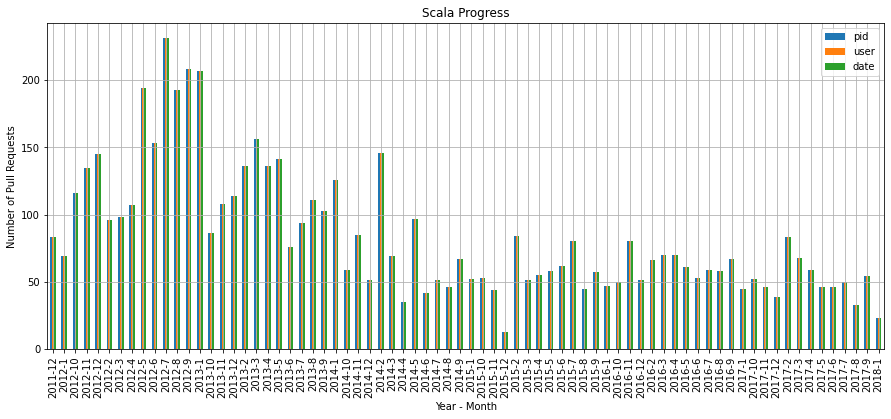

In [10]:
answer_four()

## Q5

In [11]:
def answer_five():
    user_counts = pulls_df.groupby('user')['pid'].count()
    user_counts.plot(kind='hist', figsize=(15,6), grid=True)
    plt.title("User Contributions in Scala")
    plt.xlabel("Number of users")
    plt.ylabel("Number of Pull Requests")
    plt.show()

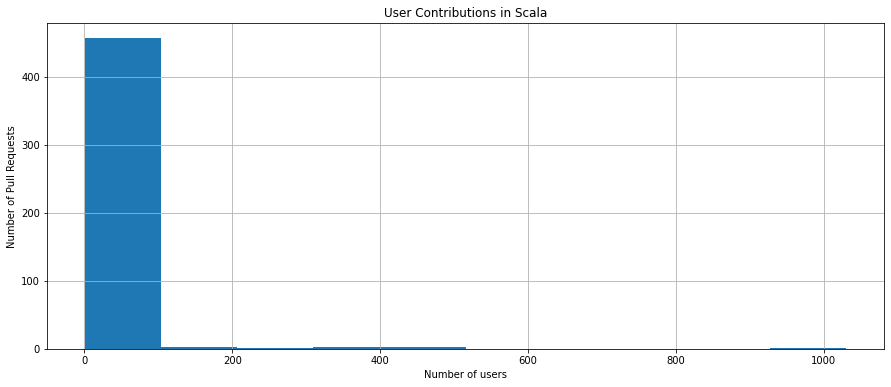

In [12]:
answer_five()

## Q6

In [13]:
def answer_six():
    return merged_df.nlargest(10, 'date')

In [14]:
answer_six()

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java
5,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumnImpl.java
6,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/Test.scala
7,163061502,joroKr21,2018-01-15 23:44:52+00:00,src/library/scala/concurrent/Lock.scala
8,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/AsyncHelp...
9,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/Profiler....


In [15]:
def answer_seven():
    file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
    file_df = merged_df[merged_df['file'] == file]
    developers_df = file_df.groupby('user').count()
    return developers_df.nlargest(3, 'pid')

In [16]:
answer_seven()

,pid,date,file
user,,,
xeno-by,11,11,11
retronym,5,5,5
soc,4,4,4


## Q8

In [17]:
def answer_eight():
    file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
    file_df = merged_df[merged_df['file'] == file]
    recent_users = file_df.nlargest(10, 'date')
    return list(recent_users['user'].unique())

In [18]:
answer_eight()

['zuvizudar', 'retronym', 'xeno-by', 'soc', 'bjornregnell', 'starblood']

## Q9

In [19]:
def answer_nine():
    
    authors = answer_eight()[1:4]
    author_df = merged_df[merged_df['user'].isin(authors)]
    author_counts = author_df.groupby(['user', author_df['date'].dt.year])['pid'].count().reset_index()
#     return author_counts
    yearwise_count = author_counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)
#     return counts_wide
    yearwise_count.plot(kind='bar', figsize=(15,6), grid=True)
    plt.title("Author Contributions")
    plt.xlabel("Year")
    plt.ylabel("Number of Pull Requests")
    plt.show()

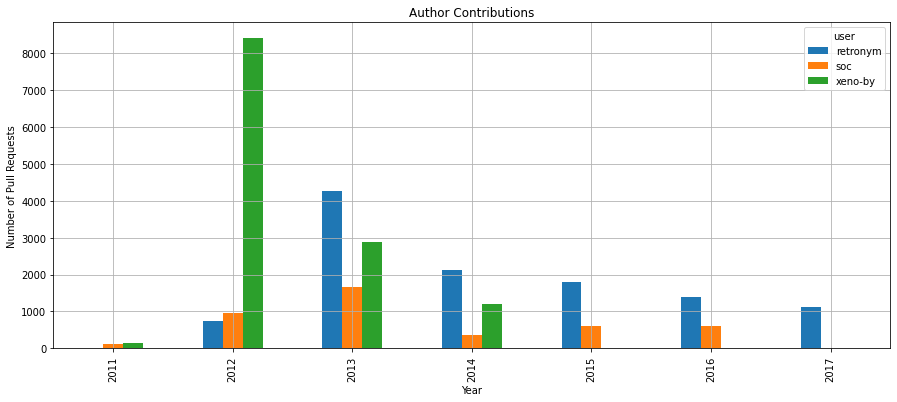

In [20]:
answer_nine()

## Q10

In [21]:
def answer_ten():
    
    authors = answer_eight()[1:4]
    file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
    author_df = merged_df[merged_df['user'].isin(authors)]
    file_affected_df = author_df[author_df['file'] == file]
    user_pulls_group = file_affected_df.groupby(['user', file_affected_df['date'].dt.year])['pid'].count().reset_index()
    yearwise_count = user_pulls_group.pivot_table(index='date', columns='user', values='pid', fill_value=0)
    
    yearwise_count.plot(kind='bar', figsize=(15,6), grid=True)
    plt.title("Author Contributions on File")
    plt.xlabel("Year")
    plt.ylabel("Number of Pull Requests")
    plt.show()

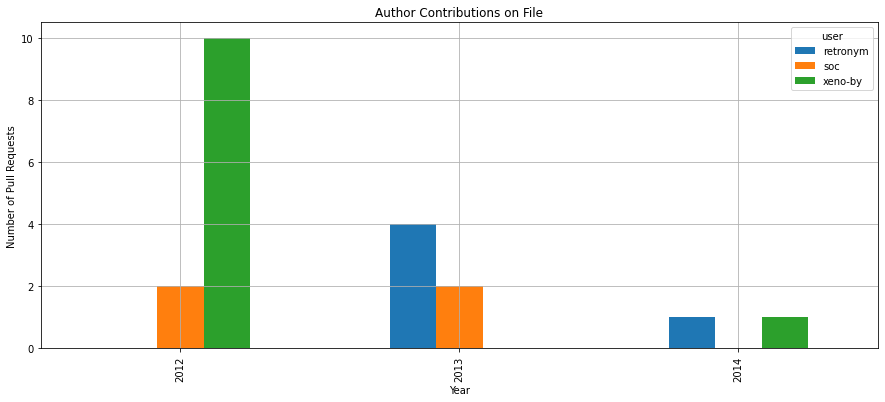

In [22]:
answer_ten()

## Q11

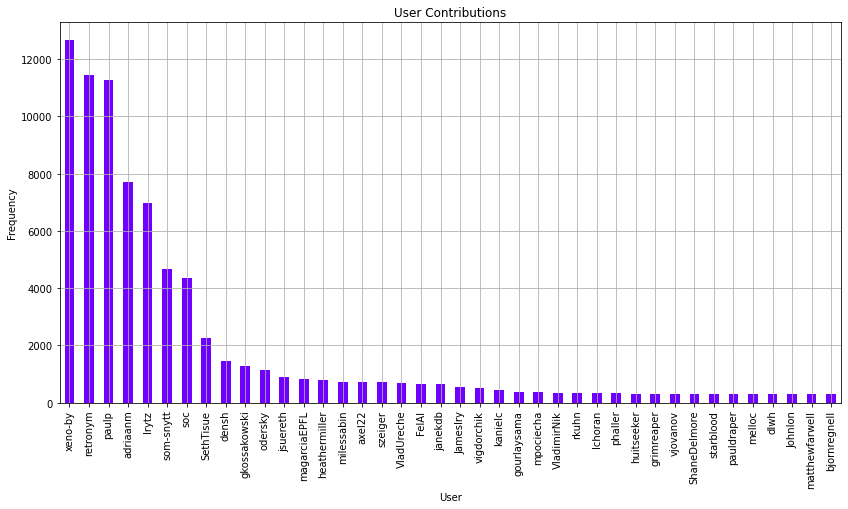

In [23]:
merged_df['user'].value_counts().nlargest(40).plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
plt.title("User Contributions")
plt.xlabel("User")
plt.ylabel("Frequency")
plt.show()

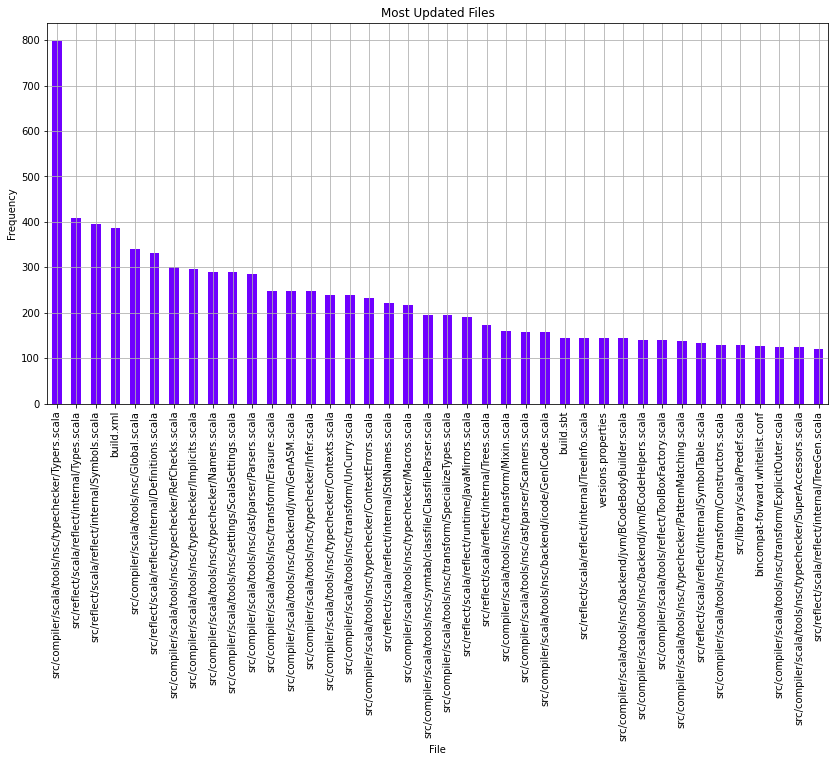

In [24]:
merged_df['file'].value_counts().nlargest(40).plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
plt.title("Most Updated Files")
plt.xlabel("File")
plt.ylabel("Frequency")
plt.show()